In [10]:
from Models import *
from Train import *
import torch


# Testing the Model training

In [3]:
import json

In [4]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [4]:
def create_json_dataset_info(dataset):
    dataset_info={}
    dataset_name=str(dataset)[0:str(dataset).index('(')]
    dataset_info['Name']=dataset_name
    dataset_info['Source']='torch_geometric.datasets'

    dataset_info['Number of graphs']=len(dataset)
    dataset_info['Number of features']=dataset.num_features
    dataset_info['Number of classes']=dataset.num_classes

    data = dataset[0]  # Get the first graph object.

    dataset_info['Number of nodes']=data.num_nodes
    dataset_info['Number of edges']=data.num_edges
    dataset_info['Number of classes']=dataset.num_classes
    
    dataset_info['Average node degree']= data.num_edges / data.num_nodes
    dataset_info['Number of training nodes']=data.train_mask.sum().item()
    dataset_info['Training node label rate']=int(data.train_mask.sum()) / data.num_nodes
    dataset_info['Has isolated nodes']=data.has_isolated_nodes()
    dataset_info['Has self-loops']=data.has_self_loops()
    dataset_info['Is undirected']=data.is_undirected()

    
    json_object = json.dumps(dataset_info, indent=4)
 
    # Writing to sample.json
    with open("dataset_info/{}.json".format(dataset_name), "w") as outfile:
        outfile.write(json_object)

    # print(f'Dataset: {dataset}:')
    # print('======================')
    # print(f'Number of graphs: {len(dataset)}')
    # print(f'Number of features: {dataset.num_features}')
    # print(f'Number of classes: {dataset.num_classes}')

    # data = dataset[0]  # Get the first graph object.

    # print()
    # print(data)
    # print('===========================================================================================================')

    # # Gather some statistics about the graph.
    # print(f'Number of nodes: {data.num_nodes}')
    # print(f'Number of edges: {data.num_edges}')
    # print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    # print(f'Number of training nodes: {data.train_mask.sum()}')
    # print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
    # print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    # print(f'Has self-loops: {data.has_self_loops()}')
    # print(f'Is undirected: {data.is_undirected()}')

    # print(dataset_info)

In [5]:
create_json_dataset_info(Planetoid(root='data/Planetoid', name='CiteSeer', transform=NormalizeFeatures()))
create_json_dataset_info(Planetoid(root='data/Planetoid', name='PubMed', transform=NormalizeFeatures()))
create_json_dataset_info(Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures()))


In [ ]:
model = GCN(hidden_channels=16,num_features=dataset.num_features,num_classes=dataset.num_classes)

# config for GCN
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
# criterion = torch.nn.CrossEntropyLoss()

params={'lr':0.01,'weight_decay':5e-4,'epochs':300,'verbose':True,'save_wts':'checkpoints/GCN_Cora_epochs=300.pt'}
TrainModel(model,data,params,'NC')


In [ ]:
from Models import GAT
model= GAT(hidden_channels=8, num_features=dataset.num_features,num_classes=dataset.num_classes,heads=8)
print(model)

# optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
# criterion = torch.nn.CrossEntropyLoss()

# params={'lr':0.005,'weight_decay':5e-4,'epochs':300,'verbose':True,'save_wts':'checkpoints/GAT_PubMed_epochs=300.pt'}
TrainModel(model,data,params)


# For Graph Classification

In [4]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='data/TUDataset', name='PROTEINS')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: PROTEINS(1113):
Number of graphs: 1113
Number of features: 3
Number of classes: 2

Data(edge_index=[2, 162], x=[42, 3], y=[1])
Number of nodes: 42
Number of edges: 162
Average node degree: 3.86
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [4]:
model = GCN_3L(hidden_channels=64,num_features=dataset.num_node_features,num_classes=dataset.num_classes)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# criterion = torch.nn.CrossEntropyLoss()

params={'lr':0.01,'epochs':150,'verbose':True,'save_wts':'checkpoints/GCN_3L_PROTEINS_epochs=300.pt'}
TrainModel(model,dataset,params,type='GC')


Epoch: 010, Train Acc: 0.6237, Test Acc: 0.6749
Epoch: 020, Train Acc: 0.6837, Test Acc: 0.6704
Epoch: 030, Train Acc: 0.7166, Test Acc: 0.7040
Epoch: 040, Train Acc: 0.7226, Test Acc: 0.7197
Epoch: 050, Train Acc: 0.7286, Test Acc: 0.7063
Epoch: 060, Train Acc: 0.6942, Test Acc: 0.6704
Epoch: 070, Train Acc: 0.7196, Test Acc: 0.7197
Epoch: 080, Train Acc: 0.7406, Test Acc: 0.7197
Epoch: 090, Train Acc: 0.7331, Test Acc: 0.7175
Epoch: 100, Train Acc: 0.7361, Test Acc: 0.7175
Epoch: 110, Train Acc: 0.7166, Test Acc: 0.6861
Epoch: 120, Train Acc: 0.6882, Test Acc: 0.6637
Epoch: 130, Train Acc: 0.7361, Test Acc: 0.7130
Epoch: 140, Train Acc: 0.6927, Test Acc: 0.6592
Saving model in checkpoints/GCN_3L_PROTEINS_epochs=300.pt


{'Loss': None, 'Train': 0.7166416791604198, 'Test': 0.6838565022421524}

In [5]:
model = GNNGraphConv(hidden_channels=64,num_features=dataset.num_node_features,num_classes=dataset.num_classes)
params={'lr':0.01,'epochs':300,'verbose':True,'save_wts':'checkpoints/GNNGraphConv_PROTEINS_epochs=300.pt'}
TrainModel(model,dataset,params,type='GC')

Epoch: 010, Train Acc: 0.6867, Test Acc: 0.6547
Epoch: 020, Train Acc: 0.7136, Test Acc: 0.6704
Epoch: 030, Train Acc: 0.6987, Test Acc: 0.6771
Epoch: 040, Train Acc: 0.7196, Test Acc: 0.6973
Epoch: 050, Train Acc: 0.6927, Test Acc: 0.6457
Epoch: 060, Train Acc: 0.7061, Test Acc: 0.7085
Epoch: 070, Train Acc: 0.7076, Test Acc: 0.7040
Epoch: 080, Train Acc: 0.7151, Test Acc: 0.6726
Epoch: 090, Train Acc: 0.7181, Test Acc: 0.6973
Epoch: 100, Train Acc: 0.7391, Test Acc: 0.6928
Epoch: 110, Train Acc: 0.7256, Test Acc: 0.6480
Epoch: 120, Train Acc: 0.7376, Test Acc: 0.7220
Epoch: 130, Train Acc: 0.7361, Test Acc: 0.7108
Epoch: 140, Train Acc: 0.7586, Test Acc: 0.7018
Epoch: 150, Train Acc: 0.7646, Test Acc: 0.7197
Epoch: 160, Train Acc: 0.7736, Test Acc: 0.6883
Epoch: 170, Train Acc: 0.7796, Test Acc: 0.6883
Epoch: 180, Train Acc: 0.7886, Test Acc: 0.6883
Epoch: 190, Train Acc: 0.7646, Test Acc: 0.7085
Epoch: 200, Train Acc: 0.7916, Test Acc: 0.7220
Epoch: 210, Train Acc: 0.7946, Test Acc:

{'Loss': None, 'Train': 0.8125937031484258, 'Test': 0.7017937219730942}

In [5]:
import data.syn_dataset 

In [7]:
dataset = data.syn_dataset.BA_LRP(root='data/')

In [6]:

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: BA_LRP(20000):
Number of graphs: 20000
Number of features: 1
Number of classes: 2

Data(x=[20, 1], edge_index=[2, 38], y=[1, 1])
Number of nodes: 20
Number of edges: 38
Average node degree: 1.90
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [ ]:
model = GNNGraphConv(hidden_channels=300,num_features=dataset.num_node_features,num_classes=dataset.num_classes)
params={'lr':0.01,'epochs':300,'verbose':True,'save_wts':'checkpoints/GNNGraphConv_BPA_LRP_epochs=300.pt'}
TrainModel(model,dataset,params,type='GC')

In [15]:
len(dataset[0].y.shape)

2

In [14]:
dataset

tensor([0.])

In [ ]:
model = GNNGraphConv(hidden_channels=64,num_features=dataset.num_node_features,num_classes=dataset.num_classes)
params={'lr':0.01,'epochs':300,'verbose':True,'save_wts':'checkpoints/GNNGraphConv_BPA_LRP_epochs=300.pt'}
TrainModel(model,dataset,params,type='GC')

In [11]:
import torch
import os.path as osp
from dig.xgraph.dataset import SynGraphDataset, BA_LRP
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# dataset = SynGraphDataset('./data', 'ba_2motifs')
# dataset.data.x = dataset.data.x.to(torch.float32)
# dim_node = dataset.num_node_features
# dim_edge = dataset.num_edge_features
# # num_targets = dataset.num_classes
# num_classes = dataset.num_classes
dataset = BA_LRP('data')

dataset.data.x = dataset.data.x.to(torch.float32)
dataset.data.y = dataset.data.y[:, 0]
dim_node = dataset.num_node_features
dim_edge = dataset.num_edge_features

In [ ]:
from dig.xgraph.models import GCN_2l
model = GCN_2l(model_level='node', dim_node=dim_node, dim_hidden=300, num_classes=num_classes)
model.to(device)
check_checkpoints()
ckpt_path = osp.join('checkpoints', 'ba_lrp', 'GCN_2l', '0', 'GCN_2l_best.ckpt')
state_dict = compatible_state_dict(torch.load(ckpt_path, map_location='cpu')['state_dict'])
model.load_state_dict(state_dict)


In [25]:
import re
from collections import OrderedDict

from torch_geometric import __version__


def compatible_state_dict(state_dict):
    comp_state_dict = OrderedDict()
    for key, value in state_dict.items():
        comp_key = key
        comp_value = value
        if int(__version__[0]) >= 2:
            comp_key = re.sub(r'conv(1|s.[0-9]).weight', 'conv\g<1>.lin.weight', key)
            if comp_key != key:
                comp_value = value.T
        if comp_key != key:
            comp_state_dict[key] = value
        comp_state_dict[comp_key] = comp_value
    return comp_state_dict

In [ ]:
from dig.xgraph.models import GCN_3l
import os


model = GCN_3l(model_level='graph', dim_node=dim_node, dim_hidden=300, num_classes=num_classes)
model.to(device)
ckpt_path = osp.join('checkpoints', 'ba_lrp', 'GCN_3l', '0', 'GCN_3l_best.ckpt')
state_dict = compatible_state_dict(torch.load(ckpt_path, map_location='cpu')['state_dict'])
model.load_state_dict(state_dict)

In [ ]:
get_model_pretrained(model_name='GCN',dataset_name='Cora')

In [4]:
get_model_pretrained('GCN_3L','MUTAG')

No weights available for this model


# Testing Twitch Dataset

In [ ]:
from torch_geometric.datasets import Twitch

dataset=Twitch(root='./data',name='EN')
data=dataset[0]

In [ ]:
print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_node_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

In [ ]:
model = GCN(hidden_channels=16,num_features=dataset.num_features,num_classes=dataset.num_classes)

# config for GCN
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
# criterion = torch.nn.CrossEntropyLoss()

params={'lr':0.01,'weight_decay':5e-4,'epochs':300,'verbose':True,'save_wts':'checkpoints/GCN_Twitch_epochs=300.pt'}
TrainModel(model,data,params,'NC')

# Testing the Explainers
File : Explainers.py

In [1]:
from Explainers import *

/opt/homebrew/anaconda3/envs/DIG_GXAI/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
createExplanations(model_name='GCN',dataset_name='Cora',type='NC')

In [ ]:
createExplanations(model_name='GCN',dataset_name='PubMed',type='NC')

In [ ]:
createExplanations(model_name='GCN',dataset_name='CiteSeer',type='NC')

In [ ]:
createExplanations(model_name='GAT',dataset_name='Cora',type='NC')

In [3]:
model_=get_model_pretrained('GAT','Cora')

In [ ]:
createExplanations(model_name='GAT',dataset_name='PubMed',type='NC')

In [4]:
createExplanations(model_name='GAT',dataset_name='CiteSeer',type='NC')

  0%|          | 0/1000 [01:30<?, ?it/s]


TypeError: 'NoneType' object is not subscriptable

In [13]:
from graphxai.explainers import GNNExplainer, PGExplainer, IntegratedGradExplainer, PGMExplainer, GradCAM


In [18]:
from Explainers import *

In [15]:
model=get_model_pretrained(model_name='GAT',dataset_name='Cora')

In [19]:
dataset = Planetoid(root='/tmp/Planetoid', name='Cora', transform=NormalizeFeatures())
data = dataset[0]
criterion=torch.nn.CrossEntropyLoss()

In [16]:
gcamex = GradCAM(model)

In [ ]:
gcam_imp_nodes(gcamex,data,1)

# Testing Disagreement_Metric.py

In [1]:
from Disagreement_Metric import *

/opt/homebrew/anaconda3/envs/DIG_GXAI/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
path='Saved_Explanations/Explanations_GCN_Cora_2022-11-26T15:02:04-75.pkl'
get_disagreement(model_name='GCN',dataset_name='Cora',type='NC',path=path)

In [ ]:
path='Saved_Explanations/Explanations_GCN_CiteSeer_2022-11-27T15:28:38-29.pkl'
get_disagreement(model_name='GCN',dataset_name='CiteSeer',type='NC',path=path)

In [ ]:
path='Saved_Explanations/Explanations_GAT_CiteSeer_2022-11-26T21:22:37-74.pkl'
get_disagreement(model_name='GAT',dataset_name='CiteSeer',type='NC',path=path)

In [ ]:
path='Saved_Explanations/Explanations_GAT_Cora_2022-11-26T20:57:56-89.pkl'
get_disagreement(model_name='GAT',dataset_name='Cora',type='NC',path=path)

Saving Disagreement_Node_Imp_GCN_CiteSeer file at disagreement/Disagreement_Node_Imp_GCN_CiteSeer_2022-11-29T10:42:20-91.png


/opt/homebrew/anaconda3/envs/DIG_GXAI/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


Saving Agg-HubScore-CosineDist_{}_{} file at disagreement/Agg-HubScore-CosineDist_GCN_CiteSeer.png
Saving Agg-AuthScore-CosineDist_{}_{} file at disagreement/Agg-AuthScore-CosineDist_GCN_CiteSeer.png


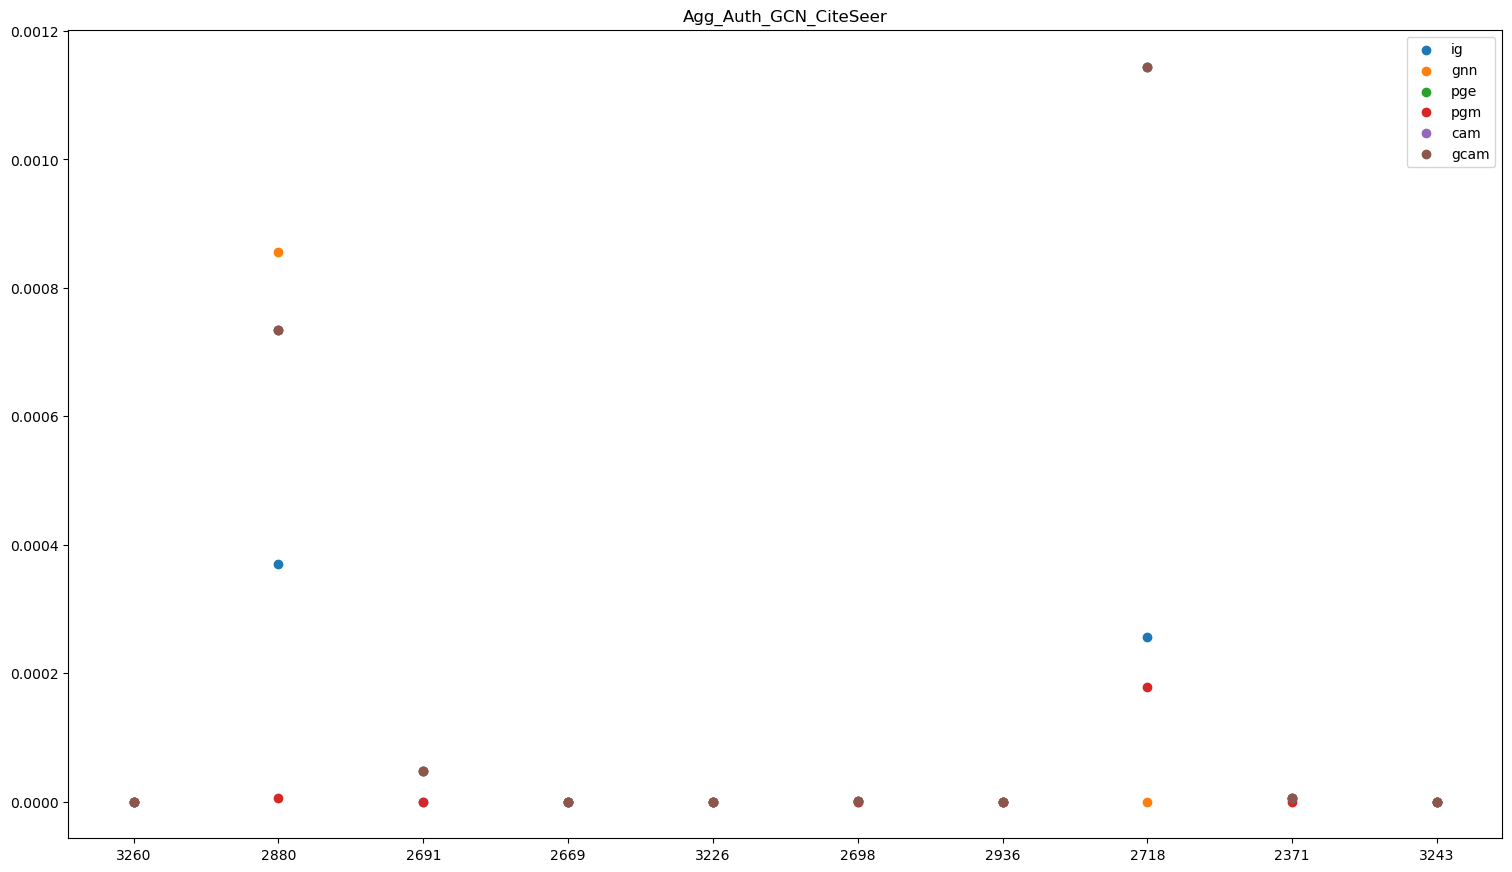

In [2]:
path='Saved_Explanations/Explanations_GCN_CiteSeer_2022-11-27T15:28:38-29.pkl'
output=get_disagreement(model_name='GCN',dataset_name='CiteSeer',type='NC',path=path)

In [5]:
np.random.choice([18,24,2323,12341,12313], size=2)

array([18, 24])

In [2]:
dataset = Planetoid(root='/tmp/Planetoid', name='CiteSeer', transform=NormalizeFeatures())
data = dataset[0]  # Get the first graph object.

In [ ]:
output